# Multiple Linear Regression Assignment - Bike Sharing Demand

## Importing important libraries

In [1]:
#importing numpy , pandas , matplotlib and seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing warnings library to ignore warnings

import warnings
warnings.filterwarnings('ignore')

## We will perform below steps as part of assignment

- Data exploration
- Data visualization
- Data preparation 
- Linear model building 
- Model evalution

## 1. Data Exploration

### 1.1 Reading and understanding data 

In [3]:
#importing bike sharing data from 'day.csv'

bike_df=pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking shape

bike_df.shape

(730, 16)

In [5]:
#checking column data types

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#analysing numberical columns

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking null values for each columns

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###  Insights
  1. There is 730 rows and 16 columns.
  2. One column is Object type else others are either type integer or float.
  3. Difference between mean and median is not much,so we can conclude that numerical columns are not having outliers.
  4. None of columns are having null values
  5. There is some intergers columns but catergorical in nature . Need to analyse those columns.

### 1.2 Handling categorical columns

In [8]:
# Handling columns those are categorical in nature . Mapping it to actual value.
# season ,yr ,mnth ,holiday ,weekday ,workingday ,weathersit --> these are the columns with categorical values. 
# We will apply map to these columns except yr ,holiday , workingday as these columns are having binary values. 
# so resultant will be same after applying dummies function.

bike_df.season = bike_df.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

bike_df.mnth = bike_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike_df.weekday = bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_df.weathersit = bike_df.weathersit.map({1:'Clear-Few_Partly_cloudy',2:'Misty-Mist_Cloudy',3:'Light_Snow-Light_Rain',4:'Heavy_Rain-Snow_Fog'})


In [9]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,Misty-Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,Misty-Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear-Few_Partly_cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thu,1,Clear-Few_Partly_cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear-Few_Partly_cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Checking datatype again

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


### 1.3 Dropping unwanted extra columns

In [11]:
#Scanning all columns

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,Misty-Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,Misty-Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear-Few_Partly_cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thu,1,Clear-Few_Partly_cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear-Few_Partly_cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Insights 
   1. We can see 'instant' column is only having row number(index value) which is not useful for our regression.
   2. Another column 'dteday' is having data information but we also have year , month and day information available in separate columns . So we can drop this column.
   3. We have 'casual' , 'registered' and 'cnt' columns which are having information of users . Only difference is user type b.w 'casual' and 'registered'. And addition of both user data we have in 'cnt' . So we can drop these two columns( 'casual','registered')

In [12]:
# Dropping columns 

bike_df.drop(columns=['instant','dteday','casual','registered'],inplace=True)

In [13]:
# Checking data again

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty-Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty-Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear-Few_Partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear-Few_Partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear-Few_Partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


## 2. Data Visualization

### 2.1 Visualizing numerical columns

In [14]:
#Scanning Numerical columns in dataframe

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


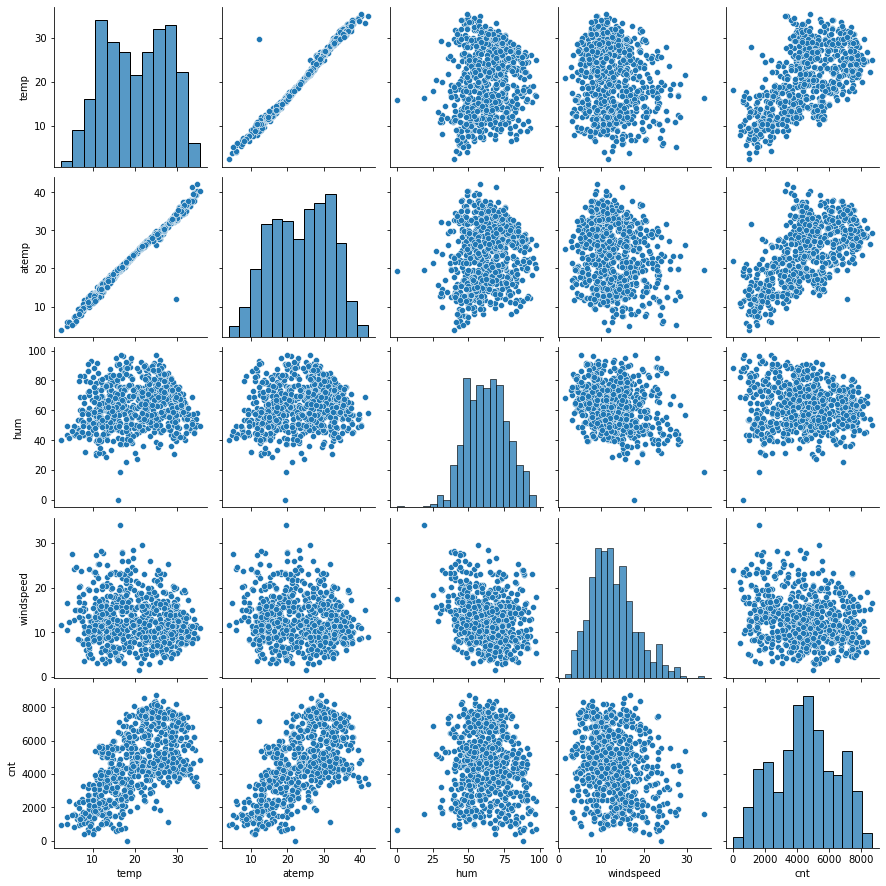

In [15]:
# Using Pairplot to visualize relation b/w numerical columns

sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

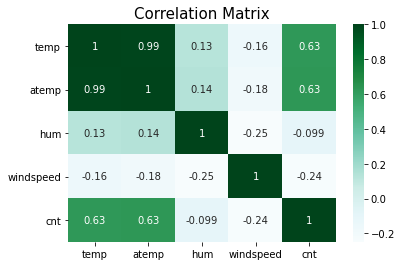

In [16]:
# Lets use correlation matrix for numerical columns
plt.title("Correlation Matrix",fontsize='15')
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn',annot=True)
plt.show()

### Insights
 - We can see linear relationship among columns temp , atemp and cnt.

### 2.2 Visualizing categorical columns

In [17]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


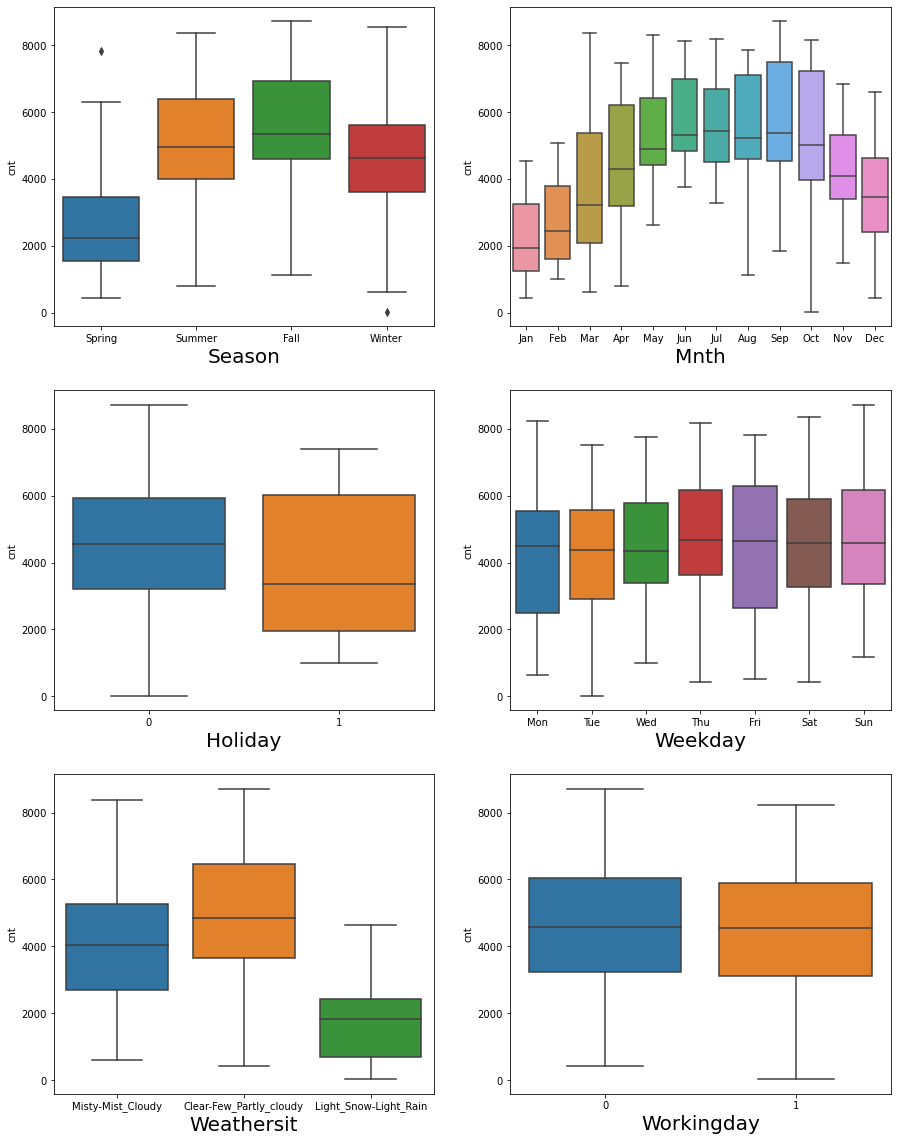

In [18]:
# Using boxplot for visualizing categorical columns

plt.figure(figsize=(15, 20))

plt.subplot(3,2,1)
sns.boxplot(x='season',y='cnt',data=bike_df)
plt.xlabel('Season', fontsize=20)
plt.subplot(3,2,2)
sns.boxplot(x='mnth',y='cnt',data=bike_df)
plt.xlabel('Mnth', fontsize=20)
plt.subplot(3,2,3)
sns.boxplot(x='holiday',y='cnt',data=bike_df)
plt.xlabel('Holiday', fontsize=20)
plt.subplot(3,2,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)
plt.xlabel('Weekday', fontsize=20)
plt.subplot(3,2,5)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)
plt.xlabel('Weathersit', fontsize=20)
plt.subplot(3,2,6)
sns.boxplot(x='workingday',y='cnt',data=bike_df)
plt.xlabel('Workingday', fontsize=20)
plt.show()

### Insights :

1. We can see most of bike booking happened in 'Fall' followed by 'Summer' and 'Winter' . So we can see season can be good candidate as predictor variable.

2. We can see most of bike booking happened in months may , june , july , august and september. So we can also use mnth as potential predictor.

3. There is also good impact of holiday column . Most of booking happened when there was not holiday as compare to opposite.

4. For weathersit , we can see when 'Clear-Few_Partly_cloudy' are having better performance as compare to other. 

5. For other left columns, We are not getting clear idea much. 

## 3. Data Preparation

### 3.1 Handling categorical columns for linear regression

In [19]:
### creating dummy variables for season , mnth ,weathersit ,weekday

dummy_df=pd.get_dummies(bike_df[['season','mnth','weekday','weathersit']],drop_first=True )

In [20]:
## adding dummy variables to original dataset

bike_df = pd.concat([dummy_df,bike_df],axis = 1)

In [21]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season_Spring                     730 non-null    uint8  
 1   season_Summer                     730 non-null    uint8  
 2   season_Winter                     730 non-null    uint8  
 3   mnth_Aug                          730 non-null    uint8  
 4   mnth_Dec                          730 non-null    uint8  
 5   mnth_Feb                          730 non-null    uint8  
 6   mnth_Jan                          730 non-null    uint8  
 7   mnth_Jul                          730 non-null    uint8  
 8   mnth_Jun                          730 non-null    uint8  
 9   mnth_Mar                          730 non-null    uint8  
 10  mnth_May                          730 non-null    uint8  
 11  mnth_Nov                          730 non-null    uint8  
 12  mnth_Oct

In [22]:
## Dropping original columns

bike_df.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [23]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season_Spring                     730 non-null    uint8  
 1   season_Summer                     730 non-null    uint8  
 2   season_Winter                     730 non-null    uint8  
 3   mnth_Aug                          730 non-null    uint8  
 4   mnth_Dec                          730 non-null    uint8  
 5   mnth_Feb                          730 non-null    uint8  
 6   mnth_Jan                          730 non-null    uint8  
 7   mnth_Jul                          730 non-null    uint8  
 8   mnth_Jun                          730 non-null    uint8  
 9   mnth_Mar                          730 non-null    uint8  
 10  mnth_May                          730 non-null    uint8  
 11  mnth_Nov                          730 non-null    uint8  
 12  mnth_Oct

In [24]:
bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow-Light_Rain,weathersit_Misty-Mist_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


### Insights
- We are now left with 30 columns after handling categorical columns .

### 3.2 Splitting data into 'Training' and 'Test'

In [25]:
#Importing library for splitting data randomly 

from sklearn.model_selection import train_test_split

# We have specified 70% data for training set anf 30% data for test set. Also defined random state to 100 .

bike_train, bike_test = train_test_split(bike_df,train_size = 0.7,test_size = 0.3,random_state = 100)

In [26]:
bike_train.shape

(510, 30)

In [27]:
bike_test.shape

(219, 30)

### 3.3 Rescaling numerical columns in training data

In [28]:
#importing library from scikit learn for rescaling numerical columns using Min - Max method

from sklearn.preprocessing import MinMaxScaler

In [29]:
#Creating an abject first

scaler= MinMaxScaler()

In [30]:
num_col=['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_col] = scaler.fit_transform(bike_train[num_col])

In [31]:
bike_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow-Light_Rain,weathersit_Misty-Mist_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [32]:
bike_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow-Light_Rain,weathersit_Misty-Mist_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Linear Model Building

In [33]:
# Diving train data into X and y

y_train=bike_train.pop('cnt')
X_train=bike_train

In [34]:
y_train.shape

(510,)

In [35]:
X_train.shape

(510, 29)

####  Now first we will use "RFE" (Recursive Feature Elimination) from scikit-learn for getting all significant columnss which we can use as part of Linear model building . 
#### Then we can proceed with statsmodel for making model more effcient.
#### So, model building will be good mixture of automatic and manual handling.

In [36]:
# Importing library for RFE

from sklearn.feature_selection import RFE

# Importing library for linear regression

from sklearn.linear_model import LinearRegression


In [37]:
# Creating object of linear regression
lm = LinearRegression()

In [38]:
# Fitting it using train data
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
# Using RFE for getting top 20 columns

rfe=RFE(lm,20)

In [40]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [41]:
# List of all columns with their ranking and rfe support

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 8),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 6),
 ('weathersit_Light_Snow-Light_Rain', True, 1),
 ('weathersit_Misty-Mist_Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [42]:
# Columns which all are supported by RFE

col=X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light_Snow-Light_Rain',
       'weathersit_Misty-Mist_Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

In [43]:
# Columns which all are not supported by RFE

X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### Now we will make new data frame using columns we got from RFE and then we can proceed with Statsmodel for model optimization

In [44]:
X_train_rfe=X_train[col]

In [45]:
X_train_rfe.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light_Snow-Light_Rain',
       'weathersit_Misty-Mist_Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

In [46]:
## Now we will use statsmodel 
## Importing library

import statsmodels.api as sm

In [47]:
# Adding constant 

X_train_rfe=sm.add_constant(X_train_rfe)

In [48]:
# fitting it using OLS

lm=sm.OLS(y_train,X_train_rfe).fit()

In [49]:
# Checking parameters 

lm.params

const                               0.380433
season_Spring                      -0.053378
season_Summer                       0.037029
season_Winter                       0.101367
mnth_Dec                           -0.048329
mnth_Feb                           -0.035678
mnth_Jan                           -0.062908
mnth_Jul                           -0.055254
mnth_Nov                           -0.043741
mnth_Sep                            0.072287
weekday_Sat                        -0.038225
weekday_Sun                        -0.032401
weathersit_Light_Snow-Light_Rain   -0.251368
weathersit_Misty-Mist_Cloudy       -0.058831
yr                                  0.230418
holiday                            -0.133522
workingday                         -0.054843
temp                                0.432212
atemp                               0.030871
hum                                -0.152876
windspeed                          -0.187634
dtype: float64

In [50]:
# Checking summery

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.51e-185
Time:                        22:52:06   Log-Likelihood:                 518.74
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     489   BIC:                            -906.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

`atemp` is insignificant in presence of other variables because of high P-Value. So we can drop this column.

In [51]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [52]:
# Rebuiding model without atemp

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.11e-186
Time:                        22:52:18   Log-Likelihood:                 518.71
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     490   BIC:                            -912.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

`weekday_Sun` is insignificant in presence of other variables because of high P-Value. So we can drop this column.

In [54]:
X_train_new = X_train_new.drop(['weekday_Sun'], axis = 1)

In [55]:
# Rebuiding model without weekday_Sun

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.88e-187
Time:                        22:52:30   Log-Likelihood:                 518.60
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

`weekday_Sat` is insignificant in presence of other variables because of high P-Value. So we can drop this column.

In [57]:
X_train_new = X_train_new.drop(['weekday_Sat'], axis = 1)

In [58]:
# Rebuiding model without weekday_Sat

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.60e-188
Time:                        22:52:43   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

`mnth_Feb` is still insignificant in presence of other variables. So we can drop this column.

In [60]:
X_train_new = X_train_new.drop(['mnth_Feb'], axis = 1)

In [61]:
# Rebuiding model without mnth_Feb

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          4.55e-189
Time:                        22:52:55   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### We can still see some of columns are having high P Value . Lets check VIF

In [63]:
# Dropping constant for now

X_train_new = X_train_new.drop(['const'], axis=1)

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,hum,31.92
13,temp,17.92
15,windspeed,4.75
0,season_Spring,4.42
2,season_Winter,4.10
12,workingday,3.69
1,season_Summer,2.83
9,weathersit_Misty-Mist_Cloudy,2.37
10,yr,2.09
6,mnth_Nov,1.84


#### We want a VIF that is less than 5. So here we need to drop some columns.

- We will remove the 'hum' column based on its high 'VIF' value.
- We can see 'hum' is having second highest VIF still we will drop 'hum' and not 'temp' because temperature is an important from business point of view for model prediction.

In [65]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [66]:
# Rebuiding model without hum

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.13e-186
Time:                        22:53:09   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [68]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,6.11
14,windspeed,4.68
12,workingday,3.58
0,season_Spring,3.08
2,season_Winter,3.07
1,season_Summer,2.31
10,yr,2.07
6,mnth_Nov,1.81
4,mnth_Jan,1.66
5,mnth_Jul,1.59


### Now we can see all columns are having VIF value less than 5 except 'temp'. So lets again drop column using P value . May that will help to reduce VIF of Temp column.

`mnth_Nov` is still insignificant because of high p value . So we can drop it

In [69]:
X_train_new = X_train_new.drop(['mnth_Nov'], axis = 1)

In [70]:
# Rebuiding model without mnth_Nov

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.0
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          8.32e-187
Time:                        22:53:20   Log-Likelihood:                 506.27
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     495   BIC:                            -919.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [72]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,6.05
13,windspeed,4.64
11,workingday,3.56
0,season_Spring,3.08
1,season_Summer,2.31
2,season_Winter,2.25
9,yr,2.07
4,mnth_Jan,1.66
5,mnth_Jul,1.59
8,weathersit_Misty-Mist_Cloudy,1.56


`mnth_Dec` is still insignificant because of high p value . So we can drop it

In [73]:
X_train_new = X_train_new.drop(['mnth_Dec'], axis = 1)

In [74]:
# Rebuiding model without mnth_Dec

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [75]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.62e-187
Time:                        22:53:29   Log-Likelihood:                 504.37
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     496   BIC:                            -921.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

`mnth_Jan` is still insignificant because of high p value . So we can drop it

In [76]:
X_train_new = X_train_new.drop(['mnth_Jan'], axis = 1)

In [77]:
# Rebuiding model without mnth_Jan

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.23e-187
Time:                        22:53:36   Log-Likelihood:                 502.08
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     497   BIC:                            -923.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

`workingday` is still insignificant because of high p value . So we can drop it

In [79]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [80]:
# Rebuiding model without workingday

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [81]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.40e-187
Time:                        22:53:42   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [82]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Misty-Mist_Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light_Snow-Light_Rain,1.08


#### Now model seems having good R- squared with allowable VIF and P values of columns

### Lets proceed with residual analysis of the train data

In [83]:
# Predicting Y value of train data

y_train_pred = lm.predict(X_train_lm)

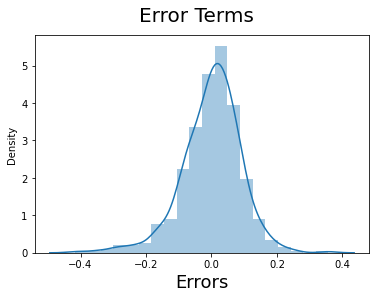

In [84]:
# Plotting actual value - predicted value (error)

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### Insights :
- Here , we can see error terms are normally distributed with mean at zero.
- R^2 for train data : `0.836`
- Adjusted R^2 for train data : `0.832`

### Making Predictions with the Final Model

In [85]:
#Scaling the test data

num_col=['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_col] = scaler.transform(bike_test[num_col])

In [86]:
bike_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow-Light_Rain,weathersit_Misty-Mist_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


In [87]:
# Diving test data into X and y

y_test=bike_test.pop('cnt')
X_test=bike_test

In [88]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 

X_test_new = sm.add_constant(X_test_new)

In [89]:
# Making predictions

y_test_pred = lm.predict(X_test_new)

In [90]:
# using scikit learn library for calculating R2 Score

from sklearn.metrics import r2_score
round(r2_score(y_test, y_test_pred),4)

0.8049

#### R square of our linear model is 80.4

In [91]:
# using scikit learn library for calculating mean_squared_error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

0.009264444750858143

## 5.  Model Evaluation

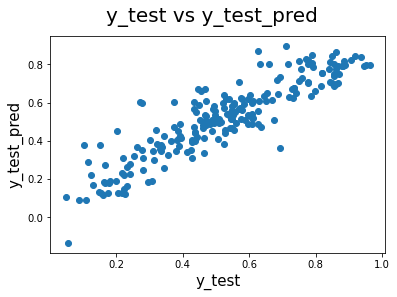

In [92]:
# Plotting y_test and y_test_pred

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_test_pred', fontsize = 15) 
plt.show()

### Insights
-  This model seems good for demand prediction of bikes based on specific features. 
- As we can see above actual and predicted values are overlapping, thus this indicates that the model is able to explain the bike demand trend.

### Creating equation for best fitted line as per our model

In [93]:
lm.params

const                               0.199648
season_Spring                      -0.066942
season_Summer                       0.045280
season_Winter                       0.083084
mnth_Jul                           -0.052418
mnth_Sep                            0.076686
weathersit_Light_Snow-Light_Rain   -0.285155
weathersit_Misty-Mist_Cloudy       -0.081558
yr                                  0.233482
holiday                            -0.098013
temp                                0.491508
windspeed                          -0.147977
dtype: float64

In [94]:
# Calculating Adjusted R-squared value for the test dataset
r2_test= r2_score(y_test, y_test_pred)
adj_r2 = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),2)
adj_r2

0.78

#### Insights :
- R^2 for test data : `0.80`
- Adjusted R^2 for test data : `0.78`

## Final conclusive points

In [95]:
# Coefficients for columns in descending order

lm.params.sort_values(ascending=False)

temp                                0.491508
yr                                  0.233482
const                               0.199648
season_Winter                       0.083084
mnth_Sep                            0.076686
season_Summer                       0.045280
mnth_Jul                           -0.052418
season_Spring                      -0.066942
weathersit_Misty-Mist_Cloudy       -0.081558
holiday                            -0.098013
windspeed                          -0.147977
weathersit_Light_Snow-Light_Rain   -0.285155
dtype: float64

### 1 . temp (Temperature) 
- Coefficient is `0.491508`. It indicates that a unit increase in temp, increase the bike demand by 0.491508 units.
(Consider other columns should not change.)

### 2 . yr (Year)
- Coefficient is `0.233482`. It indicates that a unit increase in year, increase the bike demand by 0.233482 units.
(Consider other columns should not change.)

### 3 . season_Winter
- Coefficient is `0.199648`. It indicates that a unit increase in season_Winter, increases the bike demand by 0.199648 units.
(Consider other columns should not change.)

### 4 . mnth_Sep
- Coefficient is `0.083084`. It indicates that a unit increase in mnth_Sep, increases the bike demand by 0.083084 units.
(Consider other columns should not change.)

### 5 . season_Summer
- Coefficient is `0.045280`. It indicates that a unit increase in season_Summer, increases the bike demand by 0.045280 units.
(Consider other columns should not change.)

### 6 . mnth_Jul
- Coefficient is `-0.052418`. It indicates that a unit increase in mnth_Jul, decreases the bike demand by 0.052418 units.
(Consider other columns should not change.)

### 7. holiday
- Coefficient is `-0.098013`. It indicates that a unit increase in holiday, decreases the bike demand by 0.098013 units.
(Consider other columns should not change.)

### 8. windspeed
- Coefficient is `-0.147977`. It indicates that a unit increase in windspeed, decreases the bike demand by 0.147977 units.
(Consider other columns should not change.)


### Same we can translate for other columns with their coefficients.


### Key points : 
- Temp is the most significant having largest coefficient.
- Demands increase with year .
- Demands are more for the month of september.
- Demands reduce with holidays and windspeed.
